In [938]:
#Importing libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [939]:
#Importing dataset
data_train=pd.read_csv("C:/Users/DC/Downloads/Data_Train.csv",parse_dates=['Date_of_Journey'])
train=pd.DataFrame(data_train)
train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [940]:
#Date modification

df_date=pd.DataFrame()
df_date['month']=train['Date_of_Journey'].dt.month_name()
df_date['year']=train['Date_of_Journey'].dt.year
df_date['day']=train['Date_of_Journey'].dt.day_name()

df_date['type of day']=np.where((df_date['day']=='Sunday')| (df_date['day']=='Saturday'),'weekends','weekdays')

In [941]:
df_date

,month,year,day,type of day
0,March,2019,Sunday,weekends
1,January,2019,Saturday,weekends
2,September,2019,Friday,weekdays
3,December,2019,Thursday,weekdays
4,January,2019,Thursday,weekdays
...,...,...,...,...
10678,September,2019,Wednesday,weekdays
10679,April,2019,Saturday,weekends
10680,April,2019,Saturday,weekends
10681,January,2019,Thursday,weekdays


In [942]:
df_date['Price']=train['Price']

In [943]:
df_date

,month,year,day,type of day,Price
0,March,2019,Sunday,weekends,3897
1,January,2019,Saturday,weekends,7662
2,September,2019,Friday,weekdays,13882
3,December,2019,Thursday,weekdays,6218
4,January,2019,Thursday,weekdays,13302
...,...,...,...,...,...
10678,September,2019,Wednesday,weekdays,4107
10679,April,2019,Saturday,weekends,4145
10680,April,2019,Saturday,weekends,7229
10681,January,2019,Thursday,weekdays,12648


In [944]:
import matplotlib.pyplot as plt
import seaborn as sns

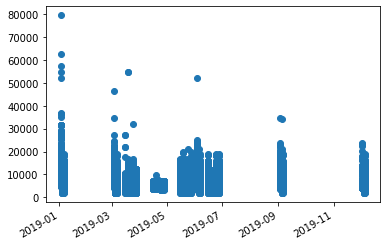

In [945]:
plt.plot_date(train['Date_of_Journey'],train['Price'])
plt.gcf().autofmt_xdate()

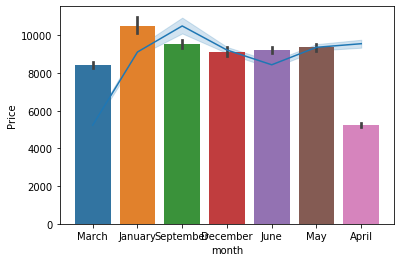

In [946]:
plt.figure()
sns.barplot('month','Price',data=df_date)
sns.lineplot('month','Price',data=df_date)

January has the highest flight fares while april has the lowest

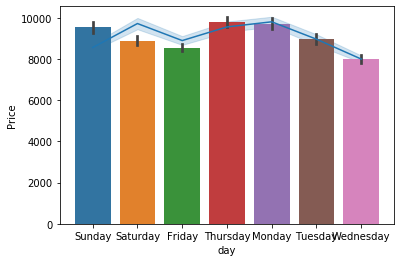

In [947]:
plt.figure()
sns.barplot('day','Price',data=df_date)
sns.lineplot('day','Price',data=df_date)

Thrusday has the highest fare while wednesday has the lowest

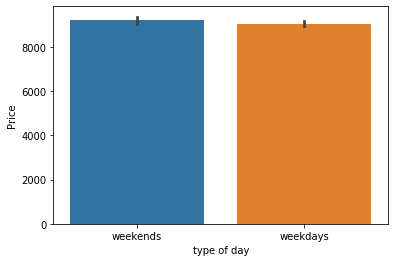

In [948]:
plt.figure()
sns.barplot('type of day','Price',data=df_date)

Weekdays have slightly lower fares than weekends.

In [949]:
train.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [950]:
#Importing dataset
data_test=pd.read_csv("C:/Users/DC/Downloads/Test_set.csv",parse_dates=['Date_of_Journey'])
test=pd.DataFrame(data_test)
test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,2019-06-06,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,2019-03-27,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,2019-06-03,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,2019-06-03,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [951]:
test.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
dtype: object

In [952]:
#null value treatment
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [953]:
#Imputation
from sklearn.impute import SimpleImputer
a=['Route','Total_Stops']
si=SimpleImputer(strategy='most_frequent')
for i in a:
    train[i]=si.fit_transform(train[i].values.reshape(-1,1))

In [954]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [955]:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [956]:
#dropping dates
train.drop(['Date_of_Journey'],axis=1,inplace=True)
test.drop(['Date_of_Journey'],axis=1,inplace=True)

In [957]:
#Splitting departure time
train['Dep_Hour']=train['Dep_Time'].str.split(':').str[0]
train['Dep_Hour']=train['Dep_Hour'].astype(int)
train.drop(['Dep_Time'],axis=1,inplace=True)

In [958]:
test['Dep_Hour']=test['Dep_Time'].str.split(':').str[0]
test['Dep_Hour']=test['Dep_Hour'].astype(int)
test.drop(['Dep_Time'],axis=1,inplace=True)

In [959]:
#Splitting Arrival time
train['Arrival_Hour']=train['Arrival_Time'].str.split(':').str[0]
train['Arrival_Hour']=train['Arrival_Hour'].astype(int)
train.drop(['Arrival_Time'],axis=1,inplace=True)

In [960]:
#Splitting Arrival time
test['Arrival_Hour']=test['Arrival_Time'].str.split(':').str[0]
test['Arrival_Hour']=test['Arrival_Hour'].astype(int)
test.drop(['Arrival_Time'],axis=1,inplace=True)

In [961]:
#Splitting Duration
train['Duration']=train['Duration'].str.split('m').str[0]
train['Dur_Hour']=train['Duration'].str.split('h').str[0]
train['Dur_Min']=train['Duration'].str.split('h ').str[1]
train['Dur_Hour']=train['Dur_Hour'].astype(int)
train['Dur_Min']=train['Dur_Min'].replace(np.NaN,'0')
train['Dur_Min']=train['Dur_Min'].astype(int)
train['Duration-mins']=(train['Dur_Hour']*60)+train['Dur_Min']
train.drop(['Duration'],axis=1,inplace=True)
train.drop(['Dur_Hour'],axis=1,inplace=True)
train.drop(['Dur_Min'],axis=1,inplace=True)

In [962]:
#Splitting Duration
test['Duration']=test['Duration'].str.split('m').str[0]
test['Dur_Hour']=test['Duration'].str.split('h').str[0]
test['Dur_Min']=test['Duration'].str.split('h ').str[1]
test['Dur_Hour']=test['Dur_Hour'].astype(int)
test['Dur_Min']=test['Dur_Min'].replace(np.NaN,'0')
test['Dur_Min']=test['Dur_Min'].astype(int)
test['Duration-mins']=(test['Dur_Hour']*60)+test['Dur_Min']
test.drop(['Duration'],axis=1,inplace=True)
test.drop(['Dur_Hour'],axis=1,inplace=True)
test.drop(['Dur_Min'],axis=1,inplace=True)

In [963]:
#Spiltting Total Stops
train['Total_Stops']=train['Total_Stops'].replace('non-stop','0 stop')
train['Total_Stops']=train['Total_Stops'].str.split(' ').str[0]
train['Total_Stops']=train['Total_Stops'].astype(int)

In [964]:
#Spiltting Total Stops
test['Total_Stops']=test['Total_Stops'].replace('non-stop','0 stop')
test['Total_Stops']=test['Total_Stops'].str.split(' ').str[0]
test['Total_Stops']=test['Total_Stops'].astype(int)

In [965]:
train

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Dep_Hour,Arrival_Hour,Duration-mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,22,1,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,5,13,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,4,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,18,23,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,16,21,285
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,0,No info,4107,19,22,150
10679,Air India,Kolkata,Banglore,CCU → BLR,0,No info,4145,20,23,155
10680,Jet Airways,Banglore,Delhi,BLR → DEL,0,No info,7229,8,11,180
10681,Vistara,Banglore,New Delhi,BLR → DEL,0,No info,12648,11,14,160


In [966]:
test

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Dep_Hour,Arrival_Hour,Duration-mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1,No info,17,4,655
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1,No info,6,10,240
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1,In-flight meal not included,19,19,1425
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1,No info,8,21,780
4,Air Asia,Banglore,Delhi,BLR → DEL,0,No info,23,2,170
...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,1,No info,20,20,1435
2667,IndiGo,Kolkata,Banglore,CCU → BLR,0,No info,14,16,155
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1,No info,21,4,395
2669,Air India,Delhi,Cochin,DEL → BOM → COK,1,No info,4,19,915


In [967]:
#label Encoder
c=['Airline','Source','Destination','Route','Additional_Info']

In [968]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for j in c:
    train[j]=le.fit_transform(train[j].astype(str))
train  

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Dep_Hour,Arrival_Hour,Duration-mins
0,3,0,5,18,0,8,3897,22,1,170
1,1,3,0,84,2,8,7662,5,13,445
2,4,2,1,118,2,8,13882,9,4,1140
3,3,3,0,91,1,8,6218,18,23,325
4,3,0,5,29,1,8,13302,16,21,285
...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,0,8,4107,19,22,150
10679,1,3,0,64,0,8,4145,20,23,155
10680,4,0,2,18,0,8,7229,8,11,180
10681,10,0,5,18,0,8,12648,11,14,160


In [969]:
for j in c:
    test[j]=le.fit_transform(test[j].astype(str))
test

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Dep_Hour,Arrival_Hour,Duration-mins
0,4,2,1,76,1,5,17,4,655
1,3,3,0,65,1,5,6,10,240
2,4,2,1,76,1,3,19,19,1425
3,6,2,1,76,1,5,8,21,780
4,0,0,2,16,0,5,23,2,170
...,...,...,...,...,...,...,...,...,...
2666,1,3,0,51,1,5,20,20,1435
2667,3,3,0,43,0,5,14,16,155
2668,4,2,1,76,1,5,21,4,395
2669,1,2,1,76,1,5,4,19,915


In [970]:
train.describe()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Dep_Hour,Arrival_Hour,Duration-mins
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,3.965927,1.952261,1.436113,74.822896,0.824207,7.393054,9087.064121,12.490686,13.348778,643.120846
std,2.352155,1.177221,1.474782,36.728405,0.675199,1.214211,4611.359167,5.748650,6.859125,507.835322
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000,0.000000,0.000000,75.000000
25%,3.000000,2.000000,0.000000,48.000000,0.000000,8.000000,5277.000000,8.000000,8.000000,170.000000
50%,4.000000,2.000000,1.000000,73.000000,1.000000,8.000000,8372.000000,11.000000,14.000000,520.000000
75%,4.000000,3.000000,2.000000,104.000000,1.000000,8.000000,12373.000000,18.000000,19.000000,930.000000
max,11.000000,4.000000,5.000000,127.000000,4.000000,9.000000,79512.000000,23.000000,23.000000,2860.000000


Outliers and skewness are present in some variables

In [971]:
#Outliers check and treatment 
from scipy.stats import zscore
threhold=3 
z=np.abs(zscore(train)) 
print(np.where(z>3))

(array([  123,   226,   396,   402,   486,   510,   553,   597,   628,
         657,   785,   785,   826,   919,   936,   946,   959,   966,
         969,   975,  1043,  1067,  1113,  1196,  1218,  1246,  1341,
        1346,  1424,  1442,  1466,  1478,  1496,  1551,  1629,  1654,
        1657,  1665,  1785,  1791,  1804,  1918,  2055,  2079,  2099,
        2108,  2172,  2172,  2405,  2481,  2495,  2495,  2553,  2556,
        2556,  2618,  2623,  2633,  2635,  2641,  2654,  2693,  2718,
        2718,  2814,  2822,  2924,  2924,  3032,  3032,  3111,  3111,
        3157,  3220,  3257,  3317,  3400,  3457,  3496,  3535,  3568,
        3584,  3700,  3700,  3788,  3790,  3815,  3815,  3945,  3966,
        4012,  4047,  4118,  4118,  4463,  4463,  4521,  4521,  4655,
        4655,  4676,  4760,  4829,  5013,  5013,  5050,  5136,  5372,
        5372,  5439,  5446,  5516,  5628,  5662,  5701,  5701,  5710,
        5711,  5719,  5738,  5745,  5782,  5838,  5856,  5933,  5947,
        5953,  5986

In [972]:
train=train[(z<=3).all(axis=1)]
train

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Dep_Hour,Arrival_Hour,Duration-mins
0,3,0,5,18,0,8,3897,22,1,170
1,1,3,0,84,2,8,7662,5,13,445
2,4,2,1,118,2,8,13882,9,4,1140
3,3,3,0,91,1,8,6218,18,23,325
4,3,0,5,29,1,8,13302,16,21,285
...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,0,8,4107,19,22,150
10679,1,3,0,64,0,8,4145,20,23,155
10680,4,0,2,18,0,8,7229,8,11,180
10681,10,0,5,18,0,8,12648,11,14,160


In [973]:
threhold=3 
z=np.abs(zscore(test)) 
print(np.where(z>3))

(array([  72,  251,  251,  484,  510,  673,  725,  786,  875,  877,  954,
       1022, 1271, 1279, 1379, 1511, 1554, 1686, 1689, 1689, 1781, 1802,
       1861, 1918, 1945, 2021, 2114, 2359, 2422, 2442, 2472, 2487, 2492],
      dtype=int64), array([4, 4, 8, 4, 8, 4, 4, 8, 4, 4, 5, 8, 8, 8, 8, 8, 8, 8, 4, 8, 8, 5,
       5, 8, 8, 4, 8, 8, 4, 4, 8, 4, 8], dtype=int64))


In [974]:
test=test[(z<=3).all(axis=1)]
test

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Dep_Hour,Arrival_Hour,Duration-mins
0,4,2,1,76,1,5,17,4,655
1,3,3,0,65,1,5,6,10,240
2,4,2,1,76,1,3,19,19,1425
3,6,2,1,76,1,5,8,21,780
4,0,0,2,16,0,5,23,2,170
...,...,...,...,...,...,...,...,...,...
2666,1,3,0,51,1,5,20,20,1435
2667,3,3,0,43,0,5,14,16,155
2668,4,2,1,76,1,5,21,4,395
2669,1,2,1,76,1,5,4,19,915


EDA-Univariate and Bivariate Analysis

In [975]:
#Correlation
train.corr()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Dep_Hour,Arrival_Hour,Duration-mins
Airline,1.000000,-0.015546,0.023705,0.024685,-0.187778,-0.064812,-0.040082,-0.044848,-0.000177,-0.142488
Source,-0.015546,1.000000,-0.581919,0.390894,0.205387,-0.042474,0.077953,0.059419,0.025525,0.174241
Destination,0.023705,-0.581919,1.000000,-0.439953,-0.323373,0.055372,-0.178610,-0.074806,-0.041367,-0.282155
Route,0.024685,0.390894,-0.439953,1.000000,0.475239,0.017539,0.255718,-0.072538,0.013277,0.297756
Total_Stops,-0.187778,0.205387,-0.323373,0.475239,1.000000,-0.093277,0.670791,-0.042642,0.029436,0.736273
Additional_Info,-0.064812,-0.042474,0.055372,0.017539,-0.093277,1.000000,-0.041717,-0.053735,0.027202,-0.183360
Price,-0.040082,0.077953,-0.178610,0.255718,0.670791,-0.041717,1.000000,0.015137,0.033259,0.578006
Dep_Hour,-0.044848,0.059419,-0.074806,-0.072538,-0.042642,-0.053735,0.015137,1.000000,0.013916,0.029946
Arrival_Hour,-0.000177,0.025525,-0.041367,0.013277,0.029436,0.027202,0.033259,0.013916,1.000000,0.038485
Duration-mins,-0.142488,0.174241,-0.282155,0.297756,0.736273,-0.183360,0.578006,0.029946,0.038485,1.000000


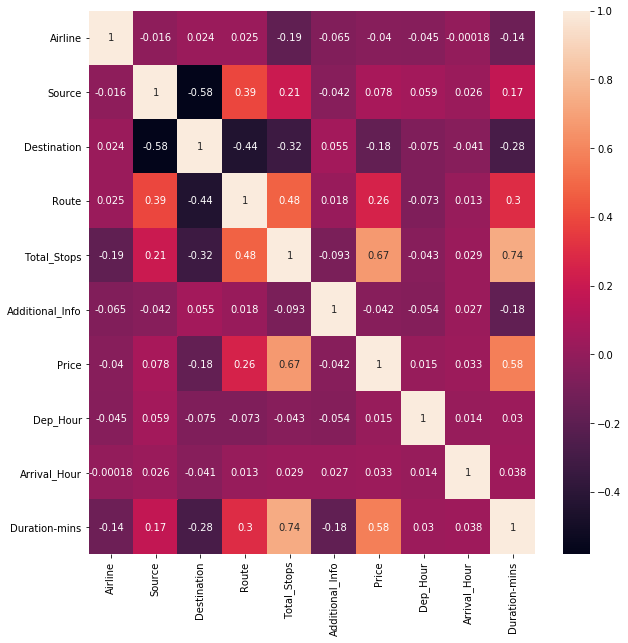

In [976]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot=True)

No signification correlation found between the variables except destination has negetive correlation with source and total stops has positive correlation with price adn duration.

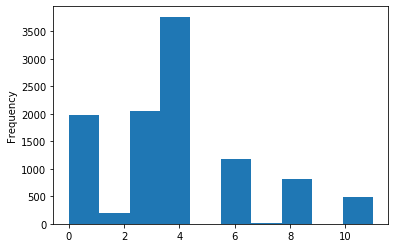

In [977]:
plt.figure()
train['Airline'].plot(kind='hist')

Airline category 4 has the highest frequency

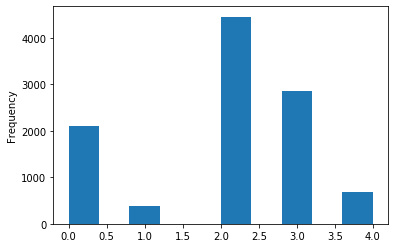

In [978]:
plt.figure()
train['Source'].plot(kind='hist')

Source category 2 has the highest frequency

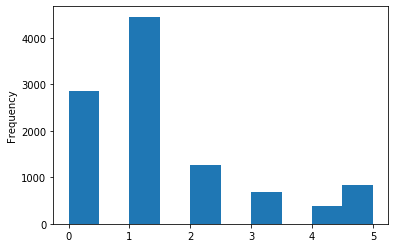

In [979]:
plt.figure()
train['Destination'].plot(kind='hist')

Destination category 1 has the highest frequency

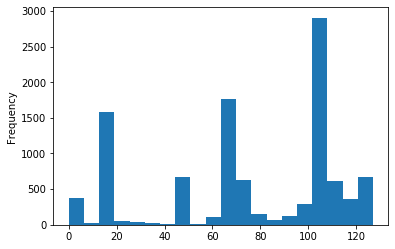

In [980]:
plt.figure()
train['Route'].plot(kind='hist',bins=20)

In [981]:
train['Route'].value_counts()

104    2368
18     1550
66      979
64      723
48      621
       ... 
94        1
46        1
53        1
81        1
96        1
Name: Route, Length: 112, dtype: int64

Route category 104 has the highest frequency

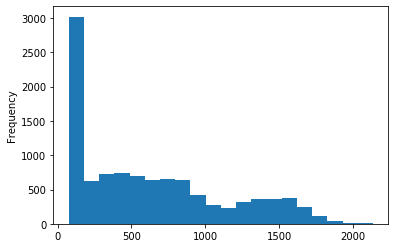

In [982]:
plt.figure()
train['Duration-mins'].plot(kind='hist',bins=20)

In [983]:
train['Duration-mins'].value_counts()

170     550
90      386
175     337
165     335
155     328
       ... 
1890      1
1810      1
250       1
2025      1
1975      1
Name: Duration-mins, Length: 346, dtype: int64

Duration of 170 mins has the highest frequency

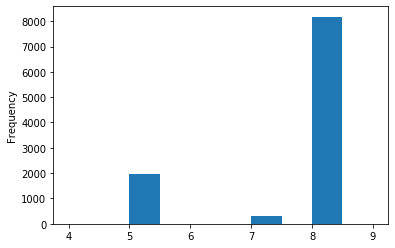

In [984]:
plt.figure()
train['Additional_Info'].plot(kind='hist')

Additional Info category 8 has the highest frequency

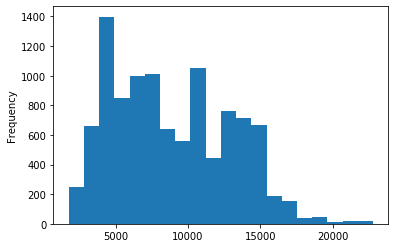

In [985]:
plt.figure()
train['Price'].plot(kind='hist',bins=20)

Price=3000(approx) has the highest frequency

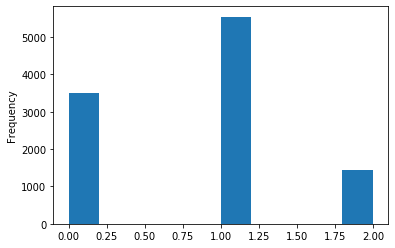

In [986]:
plt.figure()
train['Total_Stops'].plot(kind='hist')

Total Stops 1 has the highest frequency

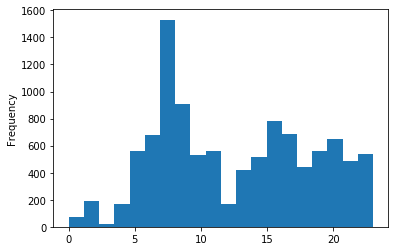

In [987]:
plt.figure()
train['Dep_Hour'].plot(kind='hist',bins=20)

dep hour around 7-8am has the highest frequency.

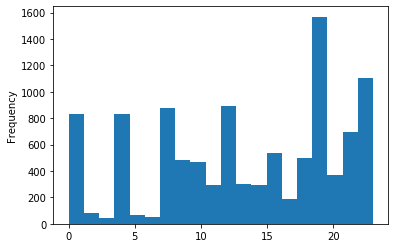

In [988]:
plt.figure()
train['Arrival_Hour'].plot(kind='hist',bins=20)

arrival hour around 5-6pm has the highest frequency.

<Figure size 432x288 with 0 Axes>

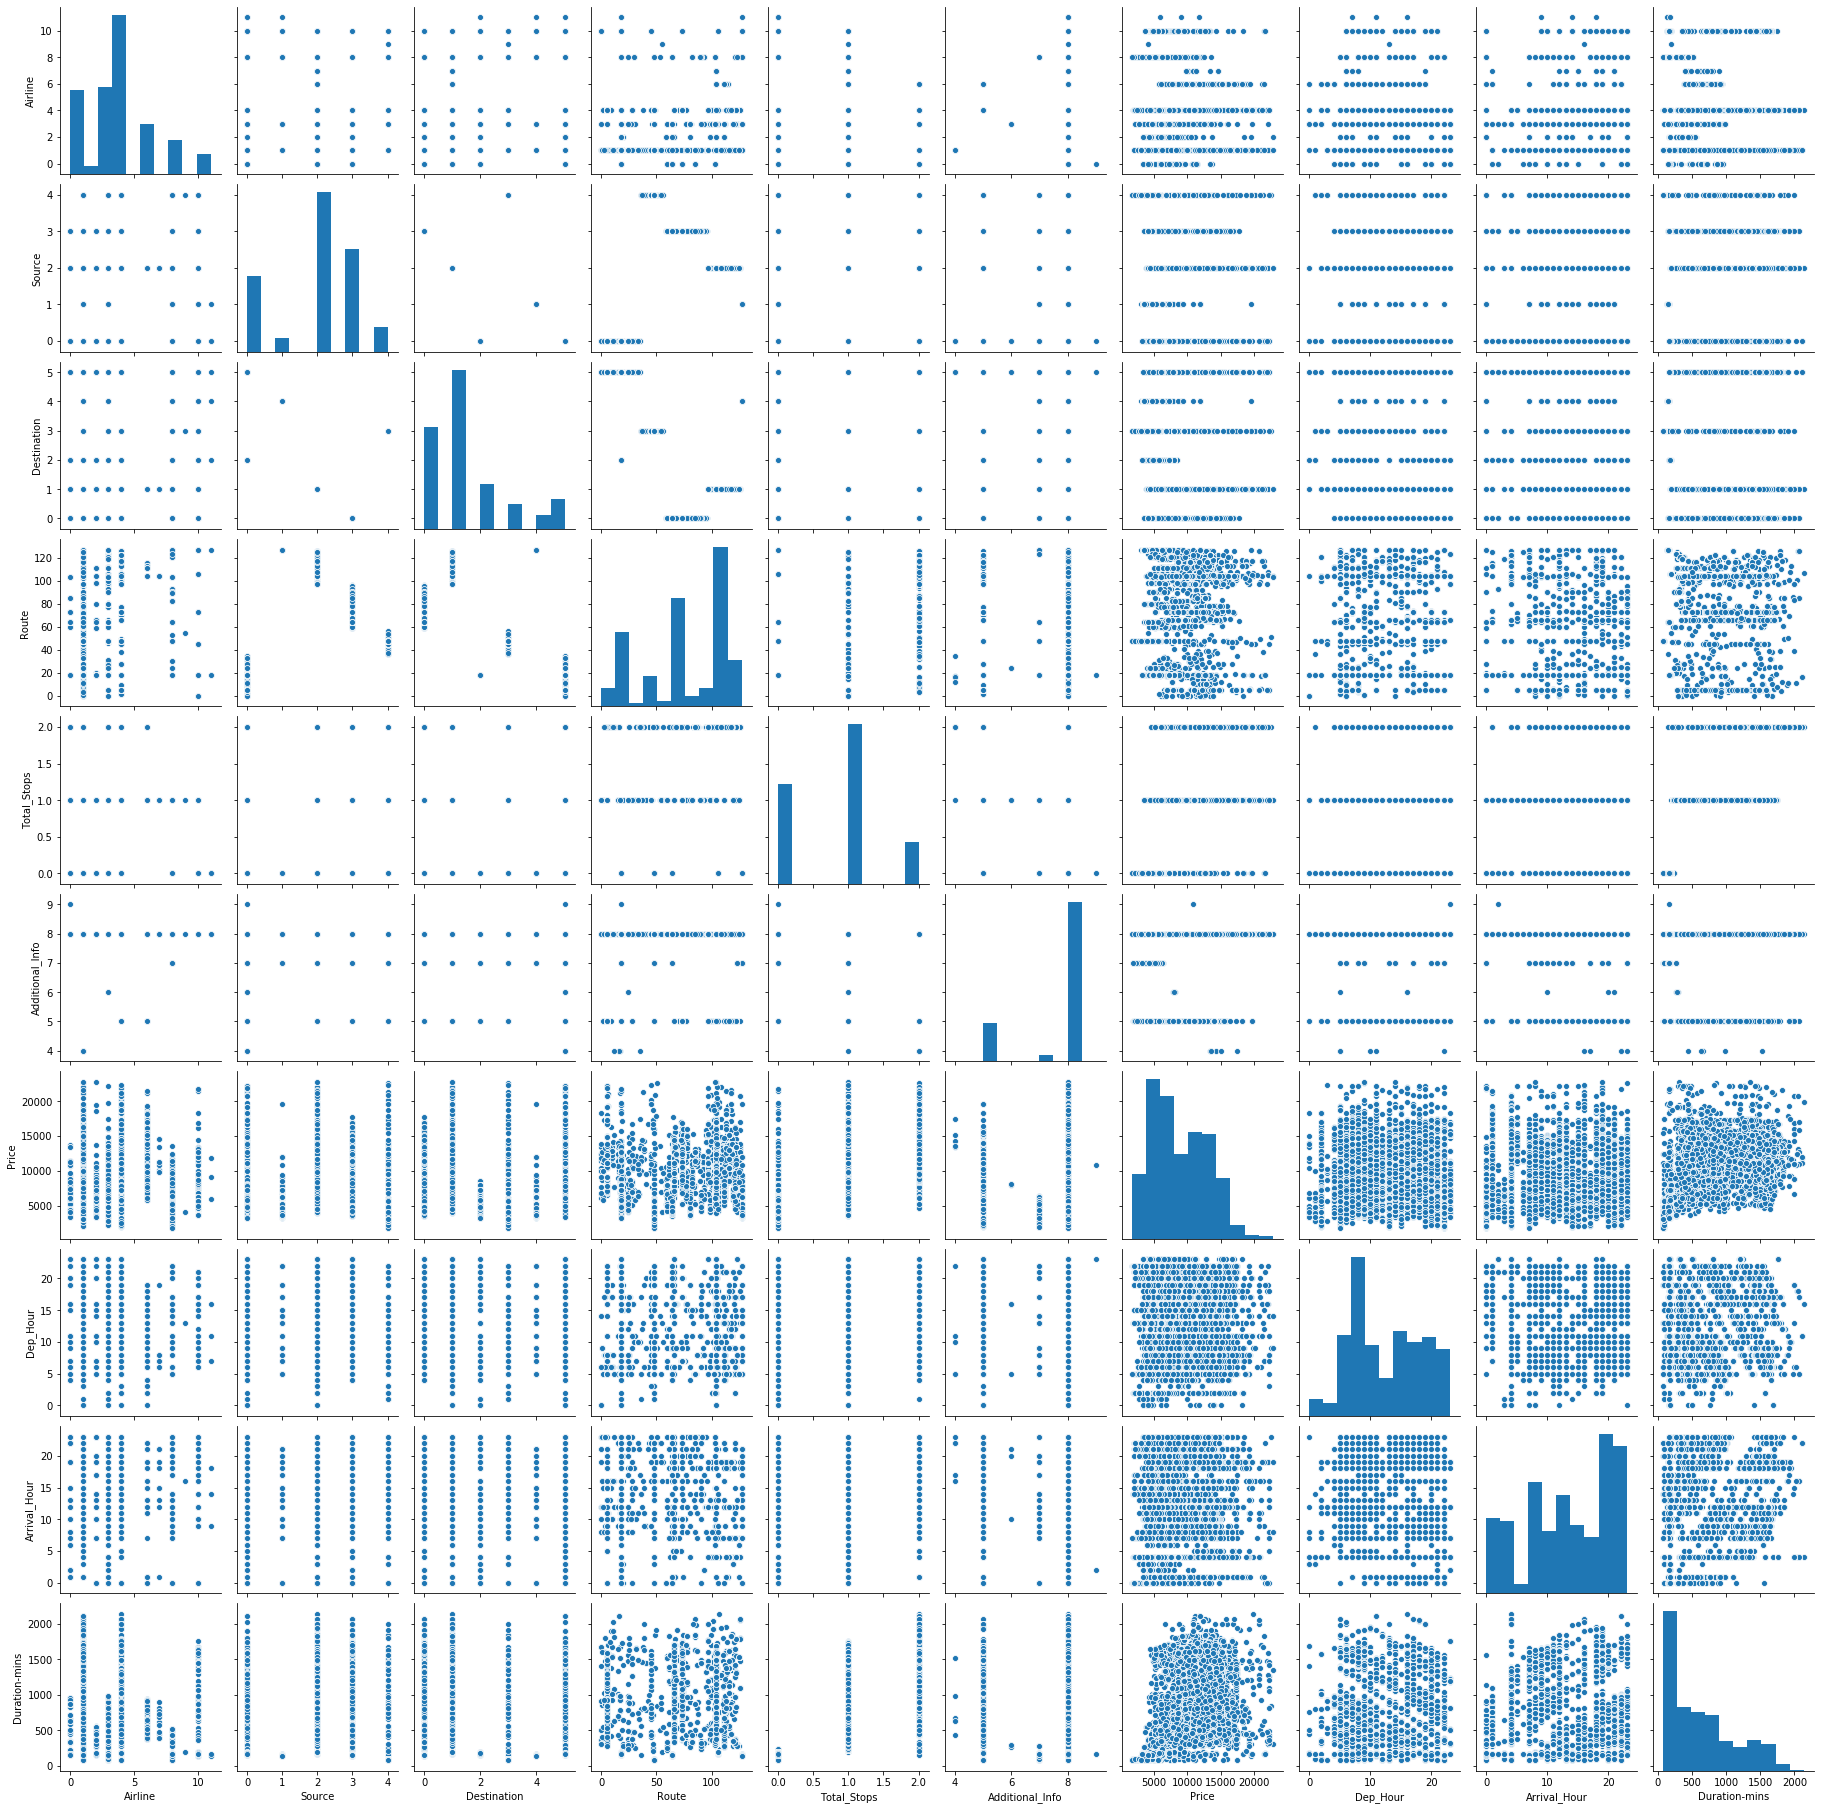

In [989]:
plt.figure()
sns.pairplot(train)

In [990]:
new=train.drop(['Price'],axis=1)

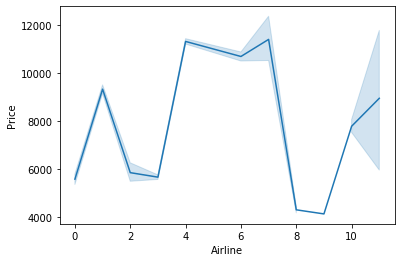

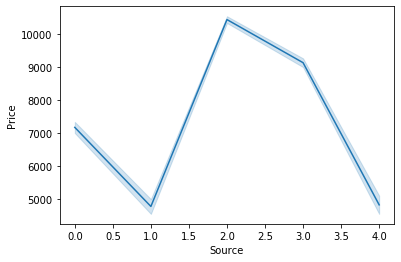

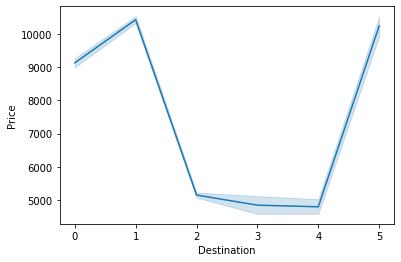

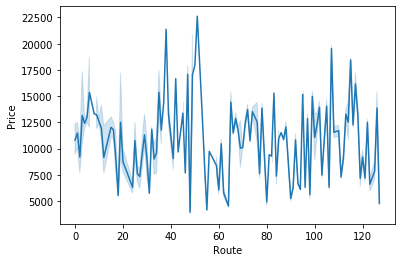

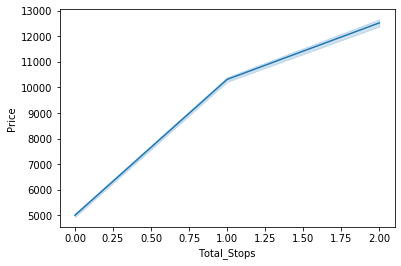

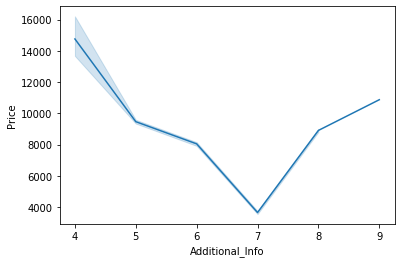

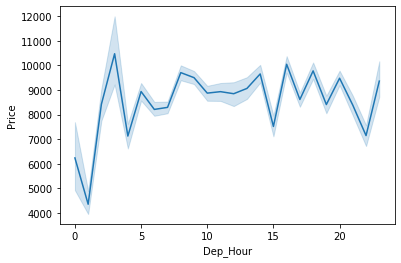

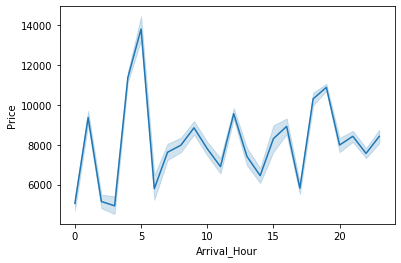

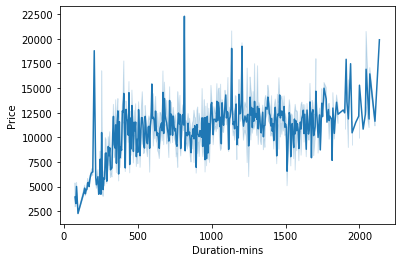

In [991]:
for i in new.columns:
    plt.figure()
    sns.lineplot(i,'Price',data=train)

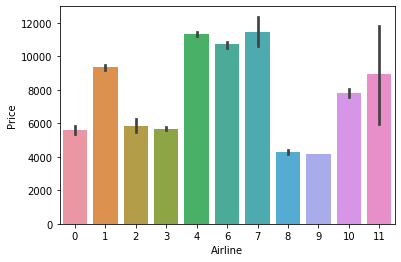

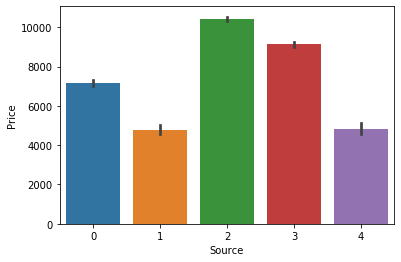

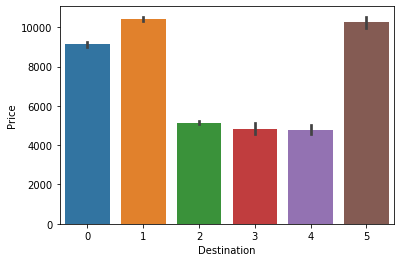

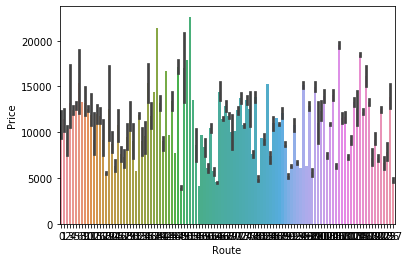

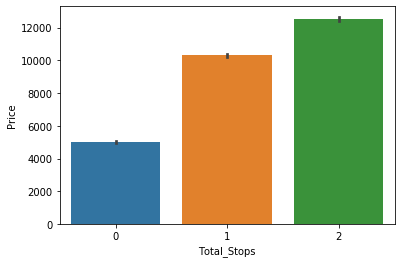

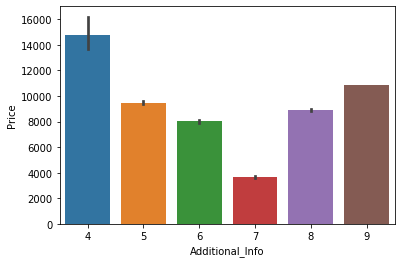

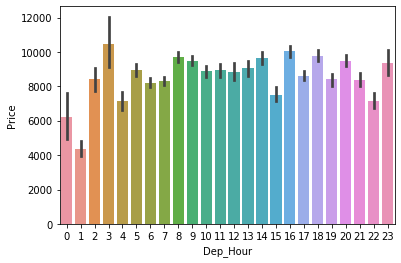

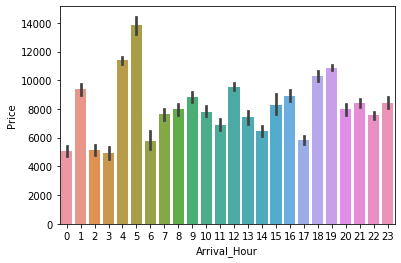

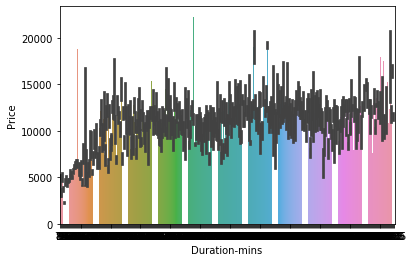

In [992]:
for i in new.columns:
    plt.figure()
    sns.barplot(i,'Price',data=train)

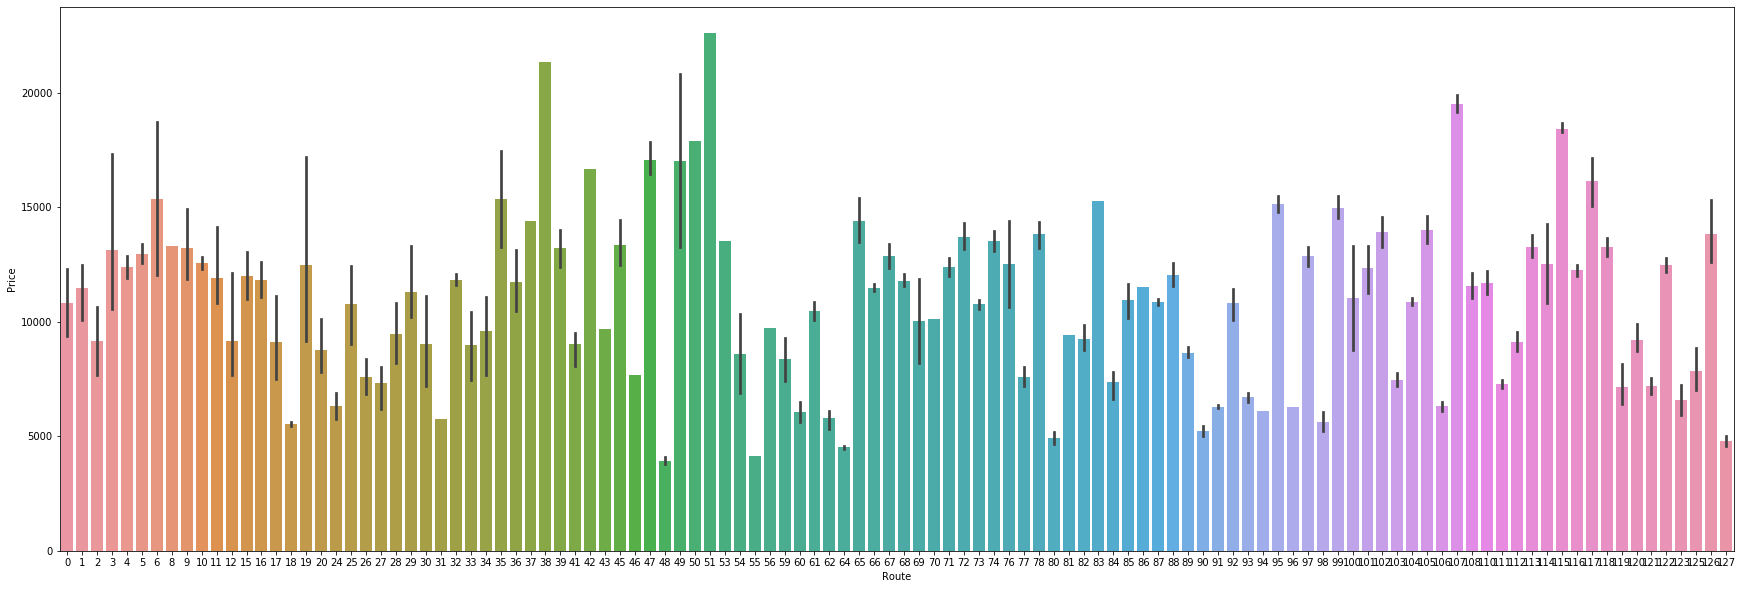

In [993]:
plt.figure(figsize=(30,10))
sns.barplot('Route','Price',data=train)

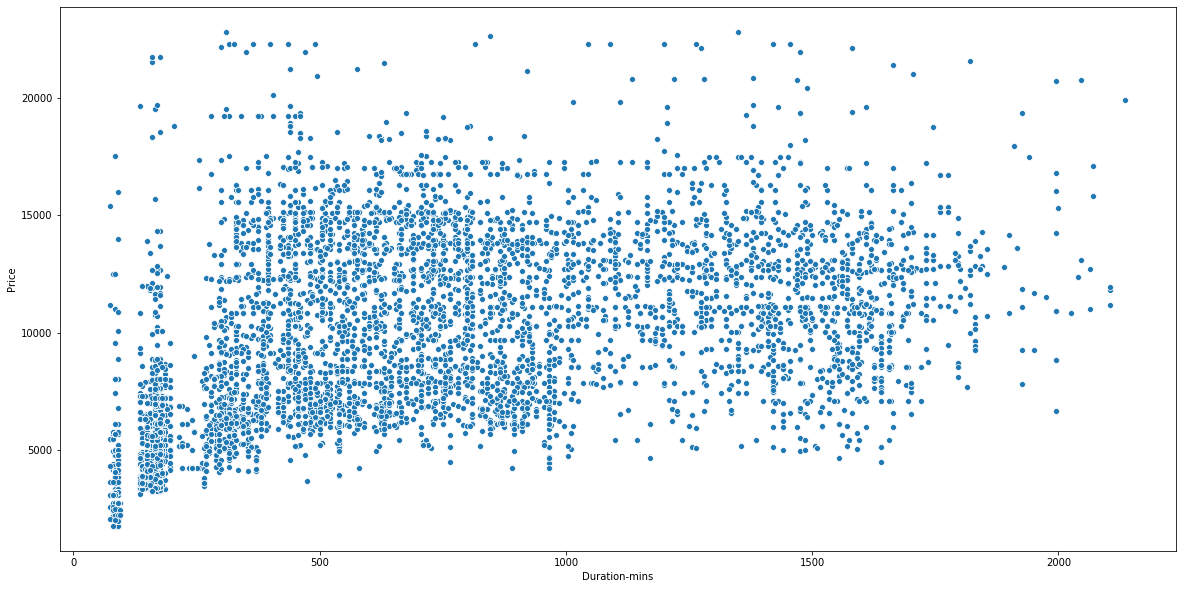

In [994]:
plt.figure(figsize=(20,10))
sns.scatterplot('Duration-mins','Price',data=train)

Airline category 7 has the highest fare and 9 has the lowest. Source category 2 has the highest fare and 1 has the lowest. Destination category 1 has the highest fare and 4 has the lowest. Route 51 has the highest fare and 48 has the lowest.Fare increases with increase in route distance and flight duration.Total stops category 3 has the highest fare and 4 has the lowest i.e. non stop flights have lower fares.Aditional info category 4 has the highest fare and 7 has the lowest.As departure hour increases, fare increases.Dep_hour=3am has the highest fare and 1am has the lowest.Arrival hour of 5am has the highest fare and 3am has the lowest.

In [995]:
#Skewness treatment
train.skew()

Airline            0.730285
Source            -0.438033
Destination        1.264940
Route             -0.506238
Total_Stops        0.230373
Additional_Info   -1.524735
Price              0.414911
Dep_Hour           0.101297
Arrival_Hour      -0.362749
Duration-mins      0.779747
dtype: float64

In [996]:
test.skew()

Airline            0.479224
Source            -0.425340
Destination        1.261535
Route             -0.276337
Total_Stops        0.205464
Additional_Info   -1.649280
Dep_Hour           0.076690
Arrival_Hour      -0.433066
Duration-mins      0.813990
dtype: float64

In [997]:
for i in train.columns:
    if train.skew().loc[i]>0.55:
        train[i]=train[i].apply(lambda x:np.log(x+1))

In [998]:
for i in test.columns:
    if test.skew().loc[i]>0.55:
        test[i]=test[i].apply(lambda x:np.log(x+1))

In [999]:
#X Y division of dataset
x=train.drop(['Price'],axis=1)
y=train['Price']
y=y.values.reshape(-1,1)
y.shape

(10480, 1)

In [1000]:
#Scaling data
import sklearn
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
dx=scale.fit_transform(x)
x=pd.DataFrame(dx,columns=x.columns)
x

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Dep_Hour,Arrival_Hour,Duration-mins
0,-0.182291,-1.677652,1.929123,-1.571536,-1.223648,0.509744,1.647793,-1.796632,-1.050338
1,-1.494596,0.882555,-1.295456,0.243549,1.814455,0.509744,-1.314457,-0.046549,0.015000
2,0.240177,0.029152,-0.048019,1.178593,1.814455,0.509744,-0.617457,-1.359111,1.058873
3,-0.182291,0.882555,-1.295456,0.436058,0.295403,0.509744,0.950793,1.411853,-0.333300
4,-0.182291,-1.677652,1.929123,-1.269022,0.295403,0.509744,0.602293,1.120173,-0.478773
...,...,...,...,...,...,...,...,...,...
10475,-2.806900,0.882555,-1.295456,-0.306477,-1.223648,0.509744,1.125043,1.266013,-1.188563
10476,-1.494596,0.882555,-1.295456,-0.306477,-1.223648,0.509744,1.299293,1.411853,-1.152362
10477,0.240177,-1.677652,0.681686,-1.571536,-1.223648,0.509744,-0.791707,-0.338230,-0.987180
10478,1.732928,-1.677652,1.929123,-1.571536,-1.223648,0.509744,-0.268957,0.099291,-1.117303


In [1001]:
dt=scale.fit_transform(test)
test=pd.DataFrame(dt,columns=test.columns)
test

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Dep_Hour,Arrival_Hour,Duration-mins
0,0.000992,0.029701,-0.061600,0.804936,0.283069,0.483239,0.761897,-1.355427,0.444697
1,-0.435633,0.872836,-1.305811,0.397991,0.283069,0.483239,-1.177234,-0.503647,-0.681434
2,0.000992,0.029701,-0.061600,0.804936,0.283069,-2.174575,1.114466,0.774023,1.317910
3,0.874242,0.029701,-0.061600,0.804936,0.283069,0.483239,-0.824665,1.057950,0.640843
4,-1.745508,-1.656569,0.666217,-1.414766,-1.251433,0.483239,1.819604,-1.639354,-1.067320
...,...,...,...,...,...,...,...,...,...
2635,-1.308883,0.872836,-1.305811,-0.119940,0.283069,0.483239,1.290750,0.915986,1.325769
2636,-0.435633,0.872836,-1.305811,-0.415900,-1.251433,0.483239,0.233043,0.348133,-1.170567
2637,0.000992,0.029701,-0.061600,0.804936,0.283069,0.483239,1.467035,-1.355427,-0.122939
2638,-1.308883,0.029701,-0.061600,0.804936,0.283069,0.483239,-1.529803,0.774023,0.820150


Modelling

In [1002]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib

In [1003]:
#Calculating best r score
def max_score(model):
    max_score=0
    for r_state in range(42,100):
        xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=r_state,test_size=0.20)
        model.fit(xtrain,ytrain)
        ypred=model.predict(xtest)
        r2=r2_score(ytest,ypred)
        if r2>max_score:
            max_score=r2
            final_r_state=r_state
    print(max_score,'is max accuracy against r_state',final_r_state)


In [1004]:
lr=LinearRegression()
max_score(lr)

0.5577710475495952 is max accuracy against r_state 56


In [1005]:
alpha={'alpha':[.0001,.001,.01,.1,1,10]}
grid=GridSearchCV(estimator=Ridge(),param_grid=alpha)
grid.fit(x,y)
print(grid.best_params_)

{'alpha': 10}


In [1012]:
rd=Ridge(alpha=10)
max_score(rd)

0.5577510702121307 is max accuracy against r_state 56


In [1013]:
alpha={'alpha':[.0001,.001,.01,.1,1,10]}
grid1=GridSearchCV(estimator=Lasso(),param_grid=alpha)
grid1.fit(x,y)
print(grid1.best_params_)

{'alpha': 1}


In [1014]:
ls=Lasso(alpha=1)
max_score(ls)

0.5577876286555956 is max accuracy against r_state 56


In [1015]:
alpha={'alpha':[.0001,.001,.01,.1,1,10]}
grid=GridSearchCV(estimator=ElasticNet(),param_grid=alpha)
grid.fit(x,y)
print(grid.best_params_)

{'alpha': 0.001}


In [1016]:
en=ElasticNet(alpha=0.001)
max_score(en)

0.5577628560328878 is max accuracy against r_state 56


In [1017]:
from sklearn.svm import SVR
para={'kernel':['rbf','linear','poly']}
grid=GridSearchCV(estimator=SVR(),param_grid=para)
grid.fit(x,y)
print(grid.best_params_)

{'kernel': 'linear'}


In [1018]:
svr=SVR(kernel='linear')
max_score(svr)

0.5084615633243936 is max accuracy against r_state 57


In [1019]:
from sklearn.neighbors import KNeighborsRegressor
#Knr
n_neighbors={'n_neighbors':[2,3,4,5,6,7,8,9]}
grid=GridSearchCV(estimator=KNeighborsRegressor(),param_grid=n_neighbors)
grid.fit(x,y)
print(grid.best_params_)

{'n_neighbors': 7}


In [1020]:
knr=KNeighborsRegressor(n_neighbors=7)
max_score(knr)

0.8065238362630793 is max accuracy against r_state 63


In [1021]:
from sklearn.tree import DecisionTreeRegressor
para={'criterion':['mse','mae','friedman_mse']}
grid=GridSearchCV(estimator=DecisionTreeRegressor(),param_grid=para)
grid.fit(x,y)
print(grid.best_params_)

{'criterion': 'mse'}


In [1022]:
dtr=DecisionTreeRegressor(criterion='mse')
max_score(dtr)

0.793047208183441 is max accuracy against r_state 57


In [1023]:
!pip install XGBoost

In [1024]:
import xgboost
from xgboost import XGBRegressor

In [1025]:
xgbr=XGBRegressor()
max_score(xgbr)

0.8233206871840391 is max accuracy against r_state 71


In [1026]:
from sklearn.ensemble import GradientBoostingRegressor
para={'n_estimators':[100,200,300,500],'learning_rate':[1,0.1,0.01,0.001]}
grid=GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=para)
grid.fit(x,y)
print(grid.best_params_)

{'learning_rate': 0.1, 'n_estimators': 500}


In [1027]:
gdr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=500)
max_score(gdr)

0.8160577102079479 is max accuracy against r_state 71


In [1028]:
from sklearn.ensemble import RandomForestRegressor
para={'n_estimators':[100,200,300,500]}
grid=GridSearchCV(estimator=RandomForestRegressor(),param_grid=para)
grid.fit(x,y)
print(grid.best_params_)

{'n_estimators': 100}


In [1031]:
rfr=RandomForestRegressor(n_estimators=100,criterion='mse')
max_score(rfr)

0.8138785962666827 is max accuracy against r_state 57


In [1032]:
#modelling on PCA data

models=[]
models.append(('Linear Regression',lr,56))
models.append(('Lasso Regression',ls,56))
models.append(('Ridge regression',rd,56))
models.append(('Elastic Net',en,56))
models.append(('Support Vector Regressor',svr,57))
models.append(('KNeighborsRegressor',knr,63))
models.append(('DecisionTreeRegressor',dtr,57))
models.append(('XGBoostRegressor',xgbr,71))
models.append(('GradientBoostingRegressor',gdr,71))
models.append(('RandomForestRegressor',rfr,57))

Model=[]
R2Score=[]
Cvs=[]
MAE=[]
MSE=[]
RMSE=[]

In [1033]:
for name,model,randomstate in models:
    print('***********',name,'************')
    print('\n')
    Model.append(name)
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=randomstate,test_size=0.20)
    model.fit(xtrain,ytrain)
    print(model)
    pred=model.predict(xtest)
    print('\n')
    R2=r2_score(ytest,pred)
    print('R2 score=',R2)
    R2Score.append(R2*100)
    print('\n')
    cvs=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('Cross Validation Score=',cvs)
    Cvs.append(cvs)
    print('\n')
    mae=mean_absolute_error(ytest,pred)
    print('Mean Absolute Error=',mae)
    MAE.append(mae)
    print('\n')
    mse=mean_squared_error(ytest,pred)
    print("Mean Squared Error=",mse)
    MSE.append(mse)
    print('\n')
    rmse=np.sqrt(mean_squared_error(ytest,pred))
    print('Root Mean Squared Error=',rmse)
    RMSE.append(rmse)

*********** Linear Regression ************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


R2 score= 0.5577710475495952


Cross Validation Score= 0.52895694698137


Mean Absolute Error= 2124.3142994462924


Mean Squared Error= 7281268.5296057435


Root Mean Squared Error= 2698.382576582821
*********** Lasso Regression ************


Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)


R2 score= 0.5577876286555956


Cross Validation Score= 0.5289589733495672


Mean Absolute Error= 2124.210577557982


Mean Squared Error= 7280995.522864242


Root Mean Squared Error= 2698.331989000657
*********** Ridge regression ************


Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


R2 score= 0.5577510702121307


Cross Validation Score=

In [1034]:
Result=pd.DataFrame({'Model':Model,'R2_Score':R2Score,'Cross Validation Score':Cvs,'Mean Absolute Error':MAE,'Mean Squared Error':MSE,'Root Mean Squared Error':RMSE})
Result

,Model,R2_Score,Cross Validation Score,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,Linear Regression,55.777105,0.528957,2124.314299,7.281269e+06,2698.382577
1,Lasso Regression,55.778763,0.528959,2124.210578,7.280996e+06,2698.331989
2,Ridge regression,55.775107,0.528958,2124.370396,7.281597e+06,2698.443525
3,Elastic Net,55.776286,0.528957,2124.336302,7.281403e+06,2698.407568
4,Support Vector Regressor,50.846156,0.473757,2116.384906,7.967611e+06,2822.695686
5,KNeighborsRegressor,80.652384,0.784279,1143.209583,3.183915e+06,1784.352880
6,DecisionTreeRegressor,79.847325,0.758626,1090.918549,3.266656e+06,1807.389142
7,XGBoostRegressor,82.332069,0.797344,1095.190371,2.913754e+06,1706.972217
8,GradientBoostingRegressor,81.607579,0.791702,1170.343812,3.033235e+06,1741.618593
9,RandomForestRegressor,81.454221,0.786102,1080.456781,3.006185e+06,1733.835357


XGBoostRegressor is the best model

In [1035]:
#saving the model
joblib.dump(xgbr,'xgbr.flight.obj')

['xgbr.flight.obj']

In [1036]:
#Loading the data
XGBR=joblib.load('xgbr.flight.obj')

In [1039]:
#prediction
XGBR.fit(x,y)
prediction=XGBR.predict(test)
print(prediction)

[8259.997  4320.514  7574.9546 ... 9522.253  9789.768  8414.061 ]


In [1040]:
test['Pred']=prediction
test

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Dep_Hour,Arrival_Hour,Duration-mins,Pred
0,0.000992,0.029701,-0.061600,0.804936,0.283069,0.483239,0.761897,-1.355427,0.444697,8259.997070
1,-0.435633,0.872836,-1.305811,0.397991,0.283069,0.483239,-1.177234,-0.503647,-0.681434,4320.514160
2,0.000992,0.029701,-0.061600,0.804936,0.283069,-2.174575,1.114466,0.774023,1.317910,7574.954590
3,0.874242,0.029701,-0.061600,0.804936,0.283069,0.483239,-0.824665,1.057950,0.640843,11255.845703
4,-1.745508,-1.656569,0.666217,-1.414766,-1.251433,0.483239,1.819604,-1.639354,-1.067320,5863.786133
...,...,...,...,...,...,...,...,...,...,...
2635,-1.308883,0.872836,-1.305811,-0.119940,0.283069,0.483239,1.290750,0.915986,1.325769,9150.015625
2636,-0.435633,0.872836,-1.305811,-0.415900,-1.251433,0.483239,0.233043,0.348133,-1.170567,5023.480957
2637,0.000992,0.029701,-0.061600,0.804936,0.283069,0.483239,1.467035,-1.355427,-0.122939,9522.252930
2638,-1.308883,0.029701,-0.061600,0.804936,0.283069,0.483239,-1.529803,0.774023,0.820150,9789.767578
